### Dataset

In [1]:
!pip install ucimlrepo

#### the libraries

In [169]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings

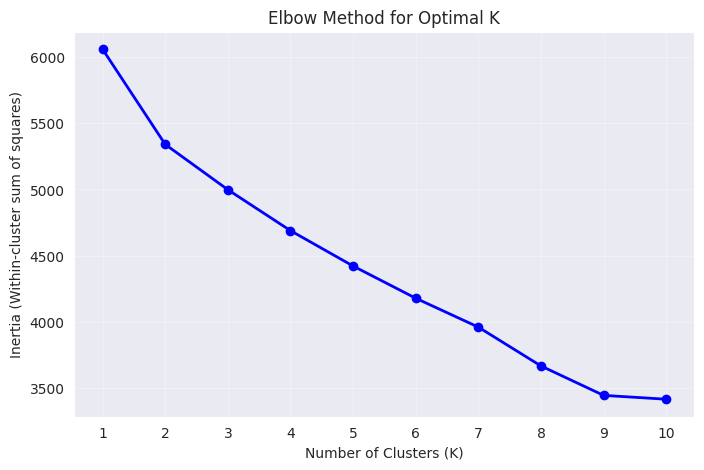

In [236]:
# Elbow method to find optimal K
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_final)
    inertias.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

In [247]:
# Assume elbow suggests K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(in_scaled)

# Add cluster labels
X_clustered = X_final.copy()
X_clustered['Cluster'] = cluster_labels

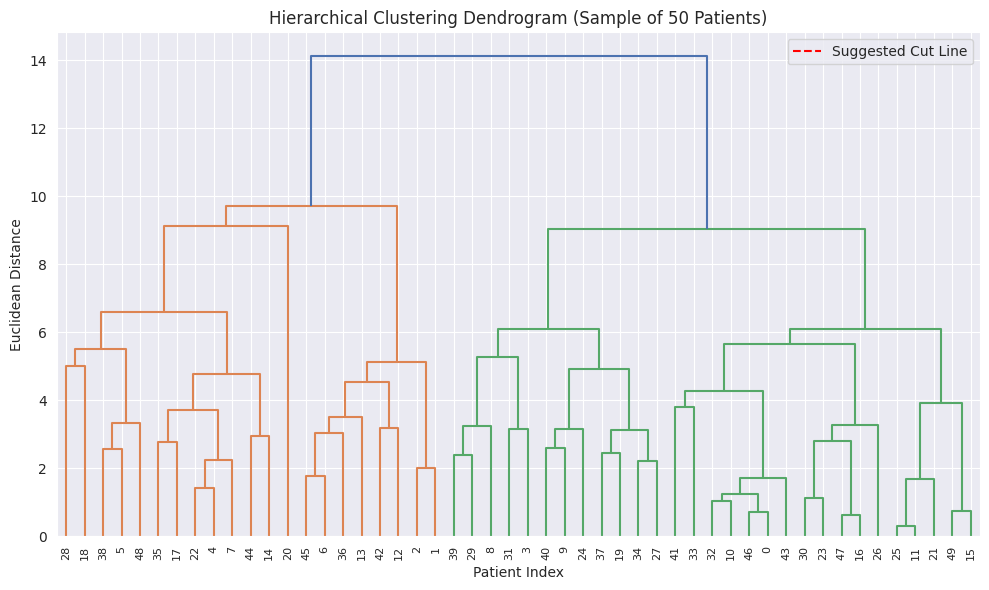

In [248]:

# Linkage
linked = linkage(in_scaled.sample(50, random_state=42), method='ward')  # Sample to speed up

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=None,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Sample of 50 Patients)')
plt.xlabel('Patient Index')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='r', linestyle='--', label='Suggested Cut Line')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
comparison = pd.crosstab(
    pd.Series(cluster_labels, name='Cluster'),
    pd.Series(y_binary, name='Heart Disease'),
    margins=True
)
print("📊 Cluster vs Actual Disease:")
print(comparison)

📊 Cluster vs Actual Disease (Contingency Table):
Heart Disease    0    1  All
Cluster                     
0               23  100  123
1              141   39  180
All            164  139  303


In [250]:

ari = adjusted_rand_score(y_binary, cluster_labels)
print(f"\n🎯 Adjusted Rand Index (vs true labels): {ari:.3f}")



🎯 Adjusted Rand Index (vs true labels): 0.347
